# Repaso de temas vistos y adicionales
<br>
<br>

<img src="explorar_datasets.png" height = "600" width = "600">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [3]:
df_employee = pd.read_csv("./datasets/employee_data.csv")
df_employee.loc[635:650, "annual_salary"] = np.nan

## Porcentaje de datos nulos

In [25]:
df_null = pd.DataFrame(df_employee.isnull().sum()).rename(columns = {0: "count_null"})
df_null["porcentage_null"] = (df_null["count_null"]/df_employee.shape[0])*100

In [26]:
df_null

,count_null,porcentage_null
number,0,0.0
first_name,1,0.1
last_name,1,0.1
gender,207,20.7
birth_date,1,0.1
employment_status,189,18.9
annual_salary,17,1.7
tax_file_no,1000,100.0


## Eliminar datos nulos de columnas

Las columnas que sean irrelevantes desde el punto de vista del contexto, o que tengan demasiado valores nulos y no puedan ser "imputados" se deben remover de los datos

In [29]:
df_employee.loc[0:0, :] = np.nan
df_employee

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,478.0,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348.0,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757.0,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937.0,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN
...,...,...,...,...,...,...,...,...
995,712.0,Dann,Crooks,NaN,1983-12-25,CA,66592.0,NaN
996,132.0,Maxim,Orn,M,1971-03-01,CA,127966.0,NaN
997,126.0,Kimberli,Walter,M,1976-03-07,CA,60712.0,NaN
998,277.0,Talmage,Bartell,F,1989-02-19,PE,103606.0,NaN


In [38]:
df_employee.dropna(axis = "rows", how = "all").head()

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
1,478.0,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348.0,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757.0,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937.0,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN
5,264.0,Jaeda,Effertz,NaN,1994-03-21,PE,131924.0,NaN


In [34]:
df_employee.drop(["tax_file_no"], axis = 1).head()

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,478.0,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348.0,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757.0,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937.0,Roby,Hudson,M,1997-01-15,NaN,137659.0


In [37]:
df_employee.dropna(axis = "columns", how = "all").head()

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,478.0,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348.0,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757.0,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937.0,Roby,Hudson,M,1997-01-15,NaN,137659.0


#### corregir utilizando la función fillna de pandas

#### Aplicar una función personalizada

In [40]:
df_employee["employment_status"].value_counts()

PE    599
CA    109
TE    103
Name: employment_status, dtype: int64

In [42]:
df_employee["employment_status"] = df_employee["employment_status"].fillna("PE")

In [52]:
df_employee

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,NaN,NaN,NaN,NaN,NaN,PE,NaN,NaN
1,478.0,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348.0,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757.0,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937.0,Roby,Hudson,M,1997-01-15,PE,137659.0,NaN
...,...,...,...,...,...,...,...,...
995,712.0,Dann,Crooks,NaN,1983-12-25,CA,66592.0,NaN
996,132.0,Maxim,Orn,M,1971-03-01,CA,127966.0,NaN
997,126.0,Kimberli,Walter,M,1976-03-07,CA,60712.0,NaN
998,277.0,Talmage,Bartell,F,1989-02-19,PE,103606.0,NaN


In [51]:
def clasificar_genero(item, gender):
    
    if not pd.isna(gender):
        return gender
    
    elif item.endswith("o") or item.endswith("r") or item.endswith("d"):
        return "M"
    
    else:
        return "F"

In [60]:
df_employee["first_name"] = df_employee["first_name"].fillna("")

df_employee["gender"] = df_employee.apply(lambda x: clasificar_genero(x["first_name"], x["gender"]), axis = 1)
df_employee

# Ejercicio

- Cargar un dataset: adult, athletes, ERC, autos, house_data
- Calcular medidas de tendencia central
- Calcular medidas de dispersion
- Medidas de Correlacion
- Realizar minimo 5 graficos diferentes (barplot, pie chart, histograma, consultar 2 mas)
- Realizar 5 conclusiones a partir de las medidas calculadas
- Realizar una documentacion, archivo word y pdf
- Realizar en lo posible un codigo con funciones si asi lo requiere, y cada funcion documentada

In [ ]:
Introduccion
Resumen
objetivos
alcances
proceso, que se analizó, graficas ... etc
conclusiones
Anexos

### Employment status

In [63]:
df_employee.dtypes

number               float64
first_name            object
last_name             object
gender                object
birth_date            object
employment_status     object
annual_salary        float64
tax_file_no          float64
dtype: object

In [65]:
df_employee["employment_status"] = df_employee["employment_status"].astype("category")

In [84]:
y = df_employee["employment_status"].value_counts()

In [87]:
labels = df_employee["employment_status"].cat.categories.tolist()
print(labels)
print([y[var] for var in labels])

['CA', 'PE', 'TE']
[109, 788, 103]


In [81]:
df_employee["employment_status"].value_counts().index.tolist()

['PE', 'CA', 'TE']

In [82]:
df_employee["employment_status"].value_counts().values.tolist()

[788, 109, 103]

In [129]:
def plot_pie_chart(df = pd.DataFrame(), 
                   fig_size = (5, 5), 
                   color = ["b", "r", "y"], 
                   shadow = True, 
                   explode = (0, 0, 0),
                   category = str):
    
    df[category] = df[category].astype("category")
    labels = df[category].cat.categories.tolist()
    counts = df[category].value_counts()
    sizes = [counts[var] for var in labels]
    
    fig, axs = plt.subplots(figsize = fig_size)
    
    axs.pie(sizes, 
            labels = labels, 
            autopct = "%1.1f%%", 
            colors = color, 
            shadow = shadow, 
            explode = explode)

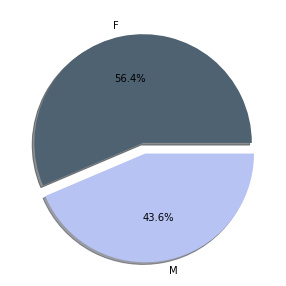

In [131]:
plot_pie_chart(df = df_employee, 
               explode = (0, 0.1),
               color = ["#4F6272", "#B7C3F3", "#DD7596"],
               category = "gender")

In [8]:
df_house = pd.read_csv("./datasets/Bengaluru_House_Data.csv")
df_house

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [17]:
df_house = df_house[df_house["price"] != 0]
df_house.dropna(subset = ["price"], inplace = True)

In [21]:
import seaborn as sns
import numpy as np

In [19]:
cv = (df_house["price"].std()/abs(df_house["price"].mean()))*100
cv

132.342064269226

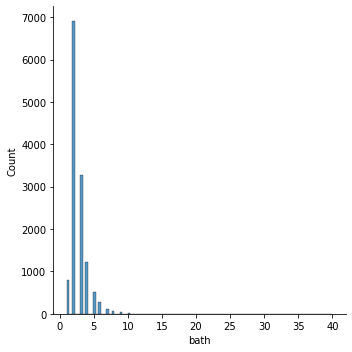

In [45]:
sns.displot(df_house["bath"], bins = 100)

In [26]:
Q3 = df_house["price"].quantile(0.75)
Q1 = df_house["price"].quantile(0.25)

In [27]:
IQR = Q3 - Q1
IQR

70.0

In [76]:
def apply_IQR(df = pd.DataFrame(), upper = 1.5, lower = 1.5, col = str):
    
    """
    doc: Esta funcion realiza el calulo de eliminacion de valores atipicos o outliers,
         utilizando el metodo del IQR
    
    inputs:
           - df: Dataset de entrada
           - upper: desviacion estandard hacia arriba
           - lower: desviacion estandard hacia abajo
           - col: columna a calcular
           
    outputs:
           - df_result: dataframe de la columna sin outliers
    
    """
    
    try:
        df = df[[col]]

        Q3 = df[col].quantile(0.75)
        Q1 = df[col].quantile(0.25)
        IQR = Q3 - Q1

        lower_limit = Q1 - lower*IQR
        upper_limit = Q3 + upper*IQR

        df_result = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
        
        return df_result
    
    except KeyError as e:
        
        print("ingrese el nombre de la columna a calcular")
        
        return []
            

In [80]:
def apply_IQR(df = pd.DataFrame(), upper = 1.5, lower = 1.5, col = str):
    
    """
    doc: Esta funcion realiza el calulo de eliminacion de valores atipicos o outliers,
         utilizando el metodo del IQR
    
    inputs:
           - df: Dataset de entrada
           - upper: desviacion estandard hacia arriba
           - lower: desviacion estandard hacia abajo
           - col: columna a calcular
           
    outputs:
           - df_result: dataframe de la columna sin outliers
    
    """
    
    df = df[[col]]

    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1

    lower_limit = Q1 - lower*IQR
    upper_limit = Q3 + upper*IQR

    df_result = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

    return df_result

In [81]:
df_price = apply_IQR(df = df_house, upper = 1.3, lower = 1.3, col = "price")

In [77]:


print(f"Cantidad de filas originales: ----> {df_house.shape[0]}")
print(f"Cantidad de filas resultantes: ---> {df_price.shape[0]}")
print(f"Cantidad de filas eliminadas: ----> {df_house.shape[0] - df_price.shape[0]}")
print("Procentaje de filas eliminadas: -->" ,((df_house.shape[0] - df_price.shape[0])/df_house.shape[0])*100)

print("Coeficiente de variacion: -------->",(df_price["price"].std()/abs(df_price["price"].mean()))*100)
sns.displot(df_price["price"], bins = 80)

ingrese el nombre de la columna a calcular
Cantidad de filas originales: ----> 13320


AttributeError: 'list' object has no attribute 'shape'

In [47]:
df_employee.dropna(subset = ["annual_salary"], inplace = True)

27.04662533857688


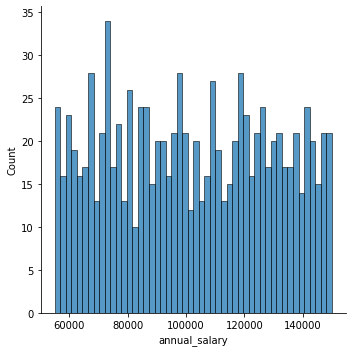

In [49]:
cv = (df_employee["annual_salary"].std()/abs(df_employee["annual_salary"].mean()))*100
print(cv)

sns.displot(df_employee["annual_salary"], bins = 50)

27.04662533857688


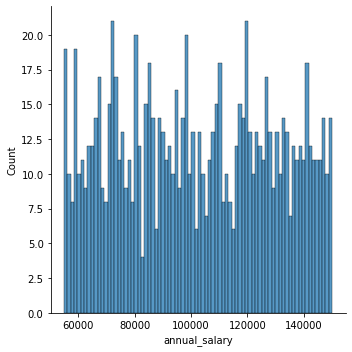

In [52]:
df_annual_salary = apply_IQR(df = df_employee, upper = 1.5, lower = 1.5, col = "annual_salary")

print((df_annual_salary["annual_salary"].std()/abs(df_annual_salary["annual_salary"].mean()))*100)
sns.displot(df_annual_salary["annual_salary"], bins = 80)

# Manipular Fechas

<br>
<img src="fechas.png" height = "550" width = "550">

# Otro dataset

## Exploración del dataset

## Visualización de variables categóricas

### Box Plot

# Seleccionar las variables

A continuación vemos que las posibles variables categóricas son las que son de tipo "object". Las demás son numéricas.

## Dataframe de solo variables categóricas

# One-Hot-Encoding

Si bien esta técnica resuelve el problema de tener pesos desiguales, sin embargo, esto no será muy útil cuando se tienen muchas categorías ya que esto agregaría demasiadas columnas y podríamos caer en la [maldición de la dimensionalidad (Curse of dimensionality)](https://en.wikipedia.org/wiki/Curse_of_dimensionality)


<img src="dummy.jpg" height = "400" width = "400">

## Utilizando Pandas

Utilizamos la función *get_dummies*